# Quantum Multiplier

This work is written as a part of the application for the Quantum Open Source Foundation (QOSF) Mentorship program. In this 'screening task' I have implemented a quantum circuit for multiplier function. This function takes input of two positive integers, converts them into qubits by basis encoding and returns the multiplication result as an integer. I have chosen to work with Qiskit framework for this task. **First I have explained step-by-step working of my code and the entire code with result including printed circuit can be found at the end of this notebook.**


* Let's import the necessary functions:

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import RGQFTMultiplier
import time


* We ask user to input the 2 integers to be multiplied and then convert them into their binary representation. Variable named *bit_limit* sets the upper bound on total number of bits in the binary representation of each input e.g. bit_limit = 3 means circuit can multiply any number between 0 to 7. If this limit is exceeded, code is stopped with an error message. This bit limit is flexible parameter and can be changed as required and rest of the code remains unchanged. **NOTE**: Multiplication, in the form of weighted sums, is performed by Qiskit's in-built `RGQFTMultiplier()` class which demands that two input registers must have the same number of qubits. So, to account for inputs with unequal digits (e.g. 10 and 101), we pad zeros on the left.


In [ ]:
bit_limit = 4  # or we can ask user to set this limit: input("Enter binary bit limit of each input")
input_list = []
input_list.append(format(int(input("Enter the first number: ")), "b"))
input_list.append(format(int(input("Enter the first number: ")), "b"))

for i in range(2):
    if len(input_list[i]) < bit_limit:
        input_list[i] = input_list[i].zfill(bit_limit)
    elif len(input_list[i]) > bit_limit:
        raise SystemExit("Number exceeds bit limit!")
        
num1 = input_list[0]
num2 = input_list[1]
print("Binary representation: " + num1, num2)


* Now we assign quantum and classical registers for our circuit. Quantum register will have total 2*(sz1+sz2) qubits: sz1 each to hold two inputs and (sz1+sz2) to hold output before classical measurement. Classical register will need (sz1+sz2) bits to hold output post-measurement.


In [ ]:
q_in1 = QuantumRegister(sz1, 'q_in_A')
q_in2 = QuantumRegister(sz2, 'q_in_B')
q = QuantumRegister(sz1+sz2, 'q')
c = ClassicalRegister(sz1+sz2, 'c')
qc0 = QuantumCircuit(q_in1, q_in2, q, c)

* Binary-converted user inputs need to be transferred onto qubits in the register. This is done by first concatinating both inputs (binary form) and applying X gate on the qubits corresponding to '1' valued bits.

In [ ]:
num1 = num1[::-1]
num2 = num2[::-1]

# For first input  
for i in range(sz1):
    if num1[i] == '1':
        qc0.x(q_in1[i])
          
# For second input  
for k in range(sz2):
    if num2[k] == '1':
        qc0.x(q_in2[k])


* Here we define a new quantum circuit for RGQFTMultiplier class. It takes 2 main arguments: number of qubits in either input register and number of result qubits to limit the output to. Then we combine it with first quantum circuit (i.e. qc0) and run it by calling Qiskit Aer simulator backend. In last step, result is converted from binary to decimal representation.


In [ ]:
qftc = RGQFTMultiplier(sz1)
qc = qc0.compose(qftc)
qc.measure(q,c)

backend=Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=5, memory=True).result()

data = result.get_memory()
answer_bin = data[len(data)-1]
answer_dec = int(answer_bin, 2)

## 1. Complete Code and Result of a Trial Run

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import RGQFTMultiplier
import time

bit_limit = 4  # or we can ask user to set this limit: input("Enter binary bit limit")
input_list = []
input_list.append(format(int(input("Enter the first number: ")), "b"))
input_list.append(format(int(input("Enter the first number: ")), "b"))

start_time = time.time()
for i in range(2):
    if len(input_list[i]) < bit_limit:
        input_list[i] = input_list[i].zfill(bit_limit)
    elif len(input_list[i]) > bit_limit:
        raise SystemExit("Number exceeds bit limit!")
        
num1 = input_list[0]
num2 = input_list[1]
print("Binary representation: " + num1, num2)

sz1 = len(num1)
sz2 = len(num2)

q_in1 = QuantumRegister(sz1, 'q_in_A')
q_in2 = QuantumRegister(sz2, 'q_in_B')
q = QuantumRegister(sz1+sz2, 'q')
c = ClassicalRegister(sz1+sz2, 'c')
qc0 = QuantumCircuit(q_in1, q_in2, q, c)

num1 = num1[::-1]
num2 = num2[::-1]

for i in range(sz1):
    if num1[i] == '1':
        qc0.x(q_in1[i])
          
for k in range(sz2):
    if num2[k] == '1':
        qc0.x(q_in2[k])

qftc = RGQFTMultiplier(sz1)
qc = qc0.compose(qftc)
qc.measure(q,c)

backend=Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=5, memory=True).result()
#print(result.get_counts(qc))

data = result.get_memory()
answer_bin = data[len(data)-1]
answer_dec = int(answer_bin, 2)
print("Answer: " + str(answer_dec))
print("Time of execution: %s seconds " % (time.time() - start_time))

Enter the first number: 10
Enter the first number: 15
Binary representation: 1010 1111
Answer: 150
Time of execution: 0.09989619255065918 seconds 


***
## 2. Quantum Circuit

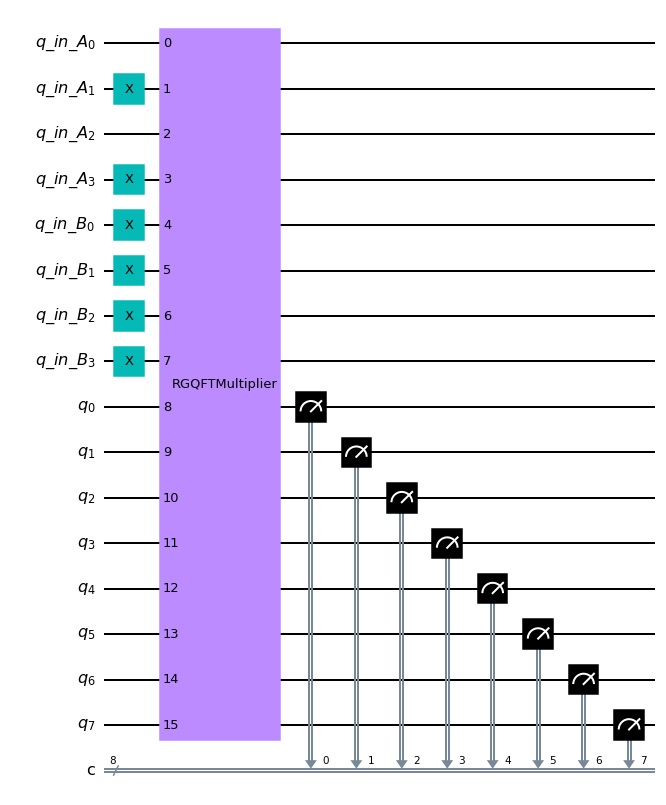

In [30]:
qc.draw('mpl')


## 3. Bonus Questions
### 3.1 Limitations of this multiplier function

**1.  Type of inputs**

> With this type of encoding, we can not handle non-integer and/or negative number inputs. Ref. [1]  proposed quantum multiplication on signed integers of form $(n \times n)$ and ref. [2] proposes quantum circuit which multiplies the signed integers of all different qubit numbers of form $(n \times m)$.

> [1]. J.J. Alvarez-Sanchez et al., A quantum architecture for multiplying signed integers, J. Phys.: Conf. Ser. 128(1) (2008) 012013.

> [2]. Şahin, E., 2020. Quantum arithmetic operations based on quantum fourier transform on signed integers. International Journal of Quantum Information, 18(06), p.2050035.

**2. Number of gates:** 

> * Number of gates scale significanlty with increasing bits. `RGQFTMultiplier()` mainly consists QFT-InverseQFT circuits and input-controlled phase rotations. A n-qubit QFT circuit requires $\frac{n (n-1)}{2}$ gates, so the *overall scaling for the QFT circuit is $\mathcal{O(n^2)}$.* 

> * Number of required phase-rotation gates for this multiplier circuit scales significantly and it would play crucial role in implementing fault-tolerant quantum computation. Universality of quantum computing can be achieved by utilizing Clifford+T gates. But realizing fault-tolerant operations and error-correction incurs significant resource overheads, especially non-Cliffords like T (i.e. $\pi/4$ rotation) gate. In addition to this, unlike non-Clifford gates, circuits composed of Clifford gates can be efficiently simulated classically. *Thus, designing of an efficient and scalable quantum circuit entails optimization of the T-count. This particular multiplier, even though produces garbage-free output, have significant T gate costs.*

**3. Number of qubits and execution time:**
> As it can be seen in the quantum circuit above, to multiply two n-bit numbers we need 4n number of qubits. As expected, execution time increases rapidly and my computer took forever to run n = 7 case. Afterall, Qiskit can not simulate a lot of qubits classicaly. Plots of required number qubits and execution time are given below. These runs were performed on a MacOS with 1.1 GHz quad-core i5 processor with 8 GB RAM.

Text(0.5, 0.98, 'Plots of execution time and required number of qubits')

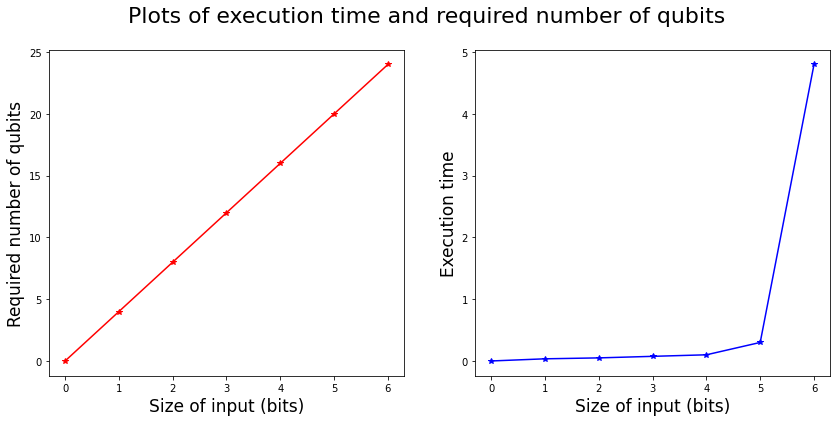

In [29]:
import matplotlib.pyplot as plt
bits = [0,1,2,3,4,5,6]
qubits = [bit * 4 for bit in bits]
runtime = [0, 0.035, 0.05, 0.075, 0.1, 0.3, 4.8]

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(bits, qubits, 'r*-')
ax[1].plot(bits, runtime, 'b*-')

ax[0].set_xlabel('Size of input (bits)', fontsize=17)
ax[1].set_xlabel('Size of input (bits)', fontsize=17)
ax[0].set_ylabel('Required number of qubits', fontsize=17)
ax[1].set_ylabel('Execution time', fontsize=17)
fig.suptitle('Plots of execution time and required number of qubits', fontsize=22)
# ax[0].set_title('Expectation values with dissipation', fontsize=17)